# ***This Notebook aims at using dataprep library for automatic EDA and XGBoost classifier for model prediction***

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv


## **Importing important libraries**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## **Read the data**

In [3]:
df = pd.read_csv("../input/crop-recommendation-dataset/Crop_recommendation.csv")

# **Using DATAPREP library for automatic EDA**

In [4]:
pip install -U dataprep

     |████████████████████████████████| 1.8 MB 411 kB/s 
     |████████████████████████████████| 88 kB 2.3 MB/s 
  Installing build dependencies ... - \ | / - \ | / - done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... - \ done
     |████████████████████████████████| 1.5 MB 3.8 MB/s 
     |████████████████████████████████| 10.1 MB 5.8 MB/s 
     |████████████████████████████████| 719 kB 7.5 MB/s 
     |████████████████████████████████| 848 kB 7.5 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 49 kB 3.0 MB/s 
     |████████████████████████████████| 743 kB 7.9 MB/s 
  Created wheel for bottleneck: filename=Bottleneck-1.3.2-cp37-cp37m-linux_x86_64.whl size=334954 sha256=ab27d6df22361052567c4a051aee1f58ae50d96a109468515058ee1ec6c6bb30
  Stored in directory: /root/.cache/pip/wheels/87/85/9c/a325c89ff0498660ef8a335fb4b3912939c273ea4f094af29f
  Created wheel for metaphone: filename=Me

  0%|          | 0/1369 [00:00<?, ?it/s]

DataPrep Report
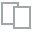
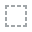
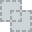
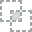
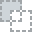
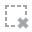
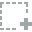
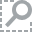
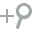
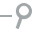
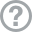
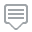
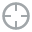
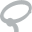
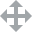
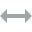
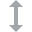
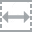
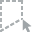
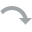
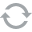
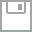
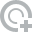
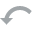
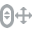
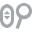
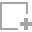
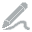
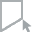
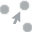
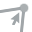
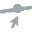

In [5]:
from dataprep.eda import create_report
create_report(df)

## **Some basic EDA**

In [6]:
df.head

<bound method NDFrame.head of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

<AxesSubplot:>

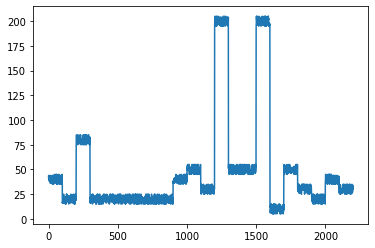

In [7]:
df["K"].plot.line()

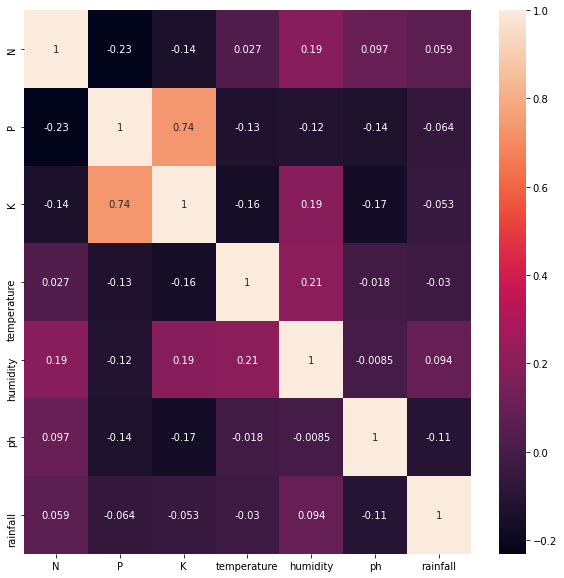

In [8]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

## **Spilliting the features and labels**

In [9]:
X = df.drop(["label"],axis=1)

In [10]:
Y = df["label"]

## **Spilliting the data**

In [11]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size = 0.3,random_state =5)

In [12]:
Xtrain.head

<bound method NDFrame.head of         N   P   K  temperature   humidity        ph    rainfall
807     6  59  21    26.589725  66.140077  6.139216   50.909945
2120  100  24  28    25.595353  57.729208  7.101661  195.773325
812     3  69  23    28.674088  63.188330  7.299361   42.960186
1442  110  22  47    29.031572  91.821726  6.243674   24.938613
1051  116  81  55    26.423133  83.699504  5.915546   95.123221
...   ...  ..  ..          ...        ...       ...         ...
740    24  80  19    29.678925  69.085455  6.808042   65.664366
1032  105  74  45    25.145176  81.382041  6.098369  119.218154
2121   83  21  28    25.567483  60.492446  7.466901  190.225784
1424  102  25  50    28.204808  92.914404  6.099662   20.360011
1725   47  46  52    23.194511  91.403016  6.502289  206.399921

[1540 rows x 7 columns]>

In [13]:
Ytrain.head

<bound method NDFrame.head of 807        lentil
2120       coffee
812        lentil
1442    muskmelon
1051       banana
          ...    
740     blackgram
1032       banana
2121       coffee
1424    muskmelon
1725       papaya
Name: label, Length: 1540, dtype: object>

## **Define the classifier**

In [14]:
XGB = xgb.XGBClassifier()

## **Fitting it**

In [15]:
XGB.fit(Xtrain,Ytrain)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:51:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## **Doing predictions**

In [16]:
preds = XGB.predict(Xtest)

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


## **Viewing the diffrent scores**

In [17]:
from sklearn import metrics

x = metrics.accuracy_score(Ytest, preds)

print(classification_report(Ytest,preds))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        39
      banana       1.00      1.00      1.00        23
   blackgram       1.00      1.00      1.00        31
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        28
      coffee       1.00      1.00      1.00        31
      cotton       0.96      1.00      0.98        24
      grapes       1.00      1.00      1.00        28
        jute       0.93      1.00      0.96        26
 kidneybeans       1.00      1.00      1.00        24
      lentil       1.00      1.00      1.00        25
       maize       1.00      0.97      0.99        35
       mango       1.00      1.00      1.00        29
   mothbeans       1.00      1.00      1.00        34
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        38
      orange       1.00      1.00      1.00        32
      papaya       1.00    

## **Normal accuracy**

In [18]:
nor = accuracy_score(Ytest,preds)
print("Normaal accuracy is :" ,nor  )

Normaal accuracy is : 0.9954545454545455


## **Testing a prediction**


In [19]:
data = np.array([[90, 42, 43, 20,82, 6.50, 202.9]])
prediction = XGB.predict(data)
print(prediction)

['rice']


## **Saving the Model**

In [20]:
filename = 'XGBoost.pkl'

XB_Model_pkl = open(filename, 'wb')
pickle.dump(XGB, XB_Model_pkl)

XB_Model_pkl.close()